In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('/content/collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


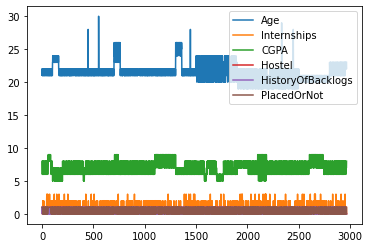

In [48]:
df.plot()

In [49]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [50]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

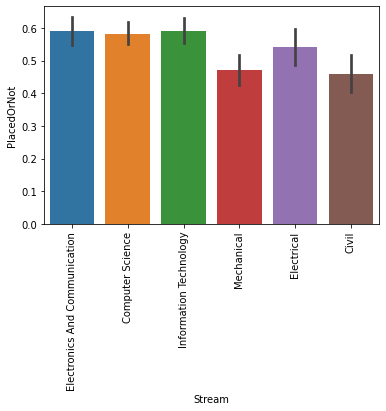

In [51]:
plt.xticks(rotation = 90)
sns.barplot(x = df.Stream, y = df.PlacedOrNot)

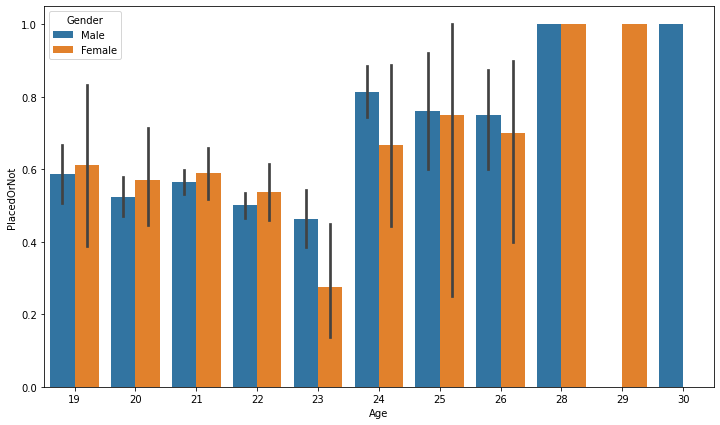

In [52]:
plt.figure(figsize = (12,7))
sns.barplot(x = df.Age, y = df.PlacedOrNot, hue = df.Gender)

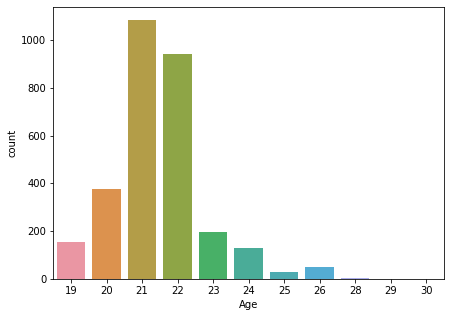

In [53]:
plt.figure(figsize = (7,5))
sns.countplot(x = df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


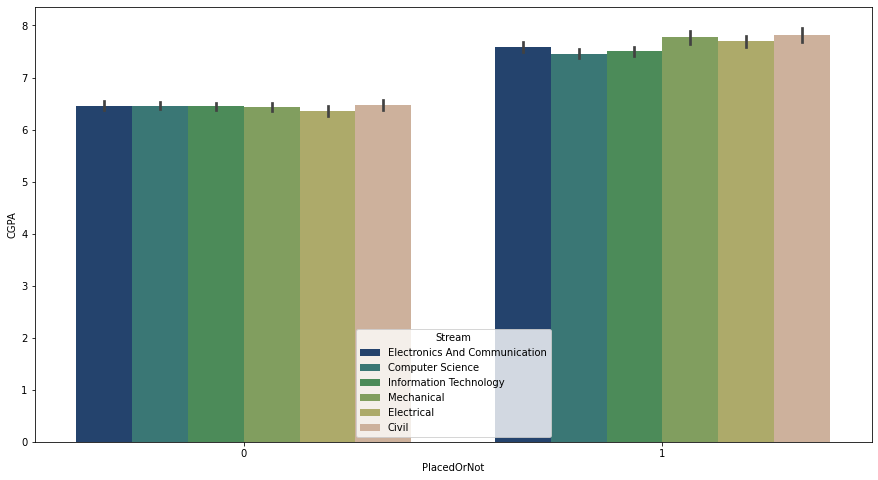

In [54]:
plt.figure(figsize = (15,8))
sns.barplot('PlacedOrNot',"CGPA",data = df,palette = 'gist_earth',hue ='Stream' )

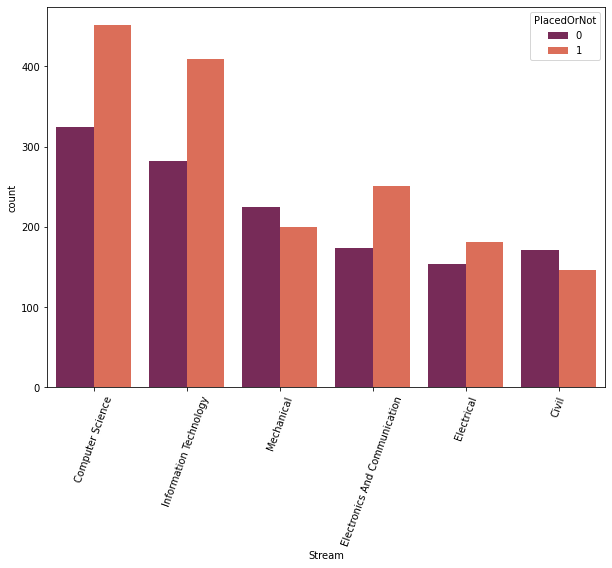

In [55]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=df,x='Stream', order = df['Stream'].value_counts().index,palette='rocket',hue='PlacedOrNot')
plt.xticks(rotation=70)
plt.show()

In [56]:
df.Age.value_counts()

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
29       1
30       1
Name: Age, dtype: int64

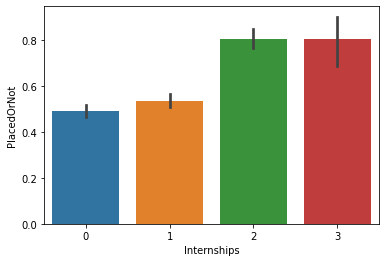

In [57]:
sns.barplot(x = df.Internships, y = df.PlacedOrNot)

In [58]:
df.Internships.value_counts()

0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64

In [59]:
df.CGPA.value_counts()

7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64

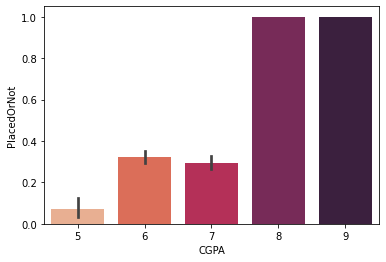

In [60]:
sns.barplot(x = df.CGPA, y = df.PlacedOrNot,palette='rocket_r')

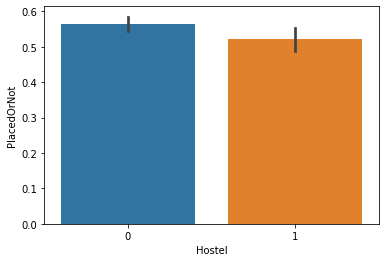

In [61]:
sns.barplot(x = df.Hostel, y = df.PlacedOrNot)

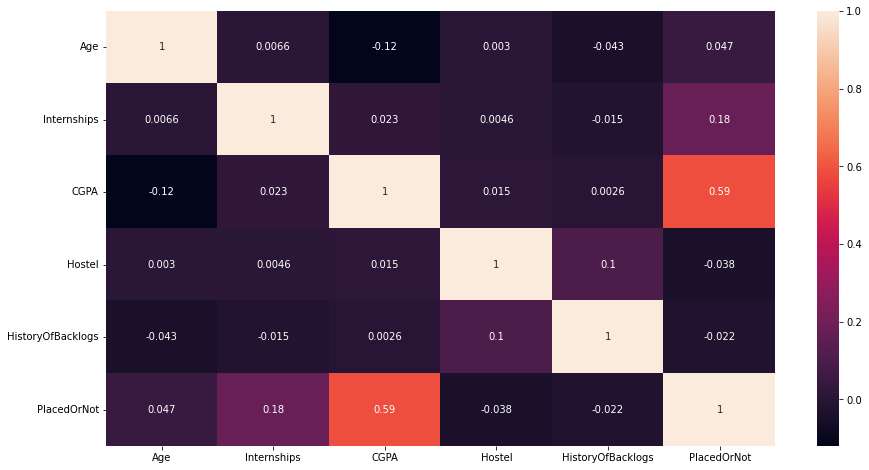

In [62]:
correlation = df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(correlation,annot = True, cmap = 'rocket')

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [64]:
x = df.drop(['PlacedOrNot'], axis = 1)
y = df.PlacedOrNot

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [67]:
models_accuracy = {}

In [68]:
logr = LogisticRegression(solver='liblinear')
logr.fit(X_train, y_train)
logr_score = logr.score(X_test, y_test)
models_accuracy['Logistic Regression'] = logr_score*100

logr_score*100

76.43097643097643

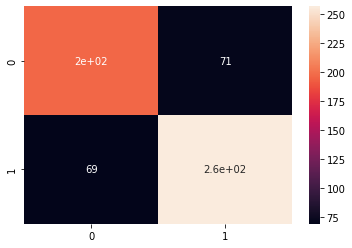

In [69]:
y_pred = logr.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [70]:
ran_model = RandomForestClassifier(n_estimators = 40)
ran_model.fit(X_train, y_train)
ran_score = ran_model.score(X_test, y_test)
models_accuracy['RanForest'] = ran_score*100

ran_score*100

87.87878787878788

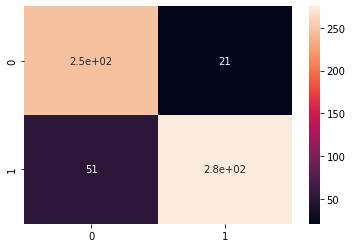

In [71]:
y_pred = ran_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [72]:
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(X_train, y_train)
kn_score = kn_model.score(X_test, y_test)
models_accuracy['Knn'] = kn_score*100

kn_score*100

89.05723905723906

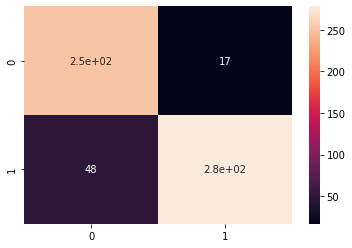

In [73]:
y_pred = kn_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)